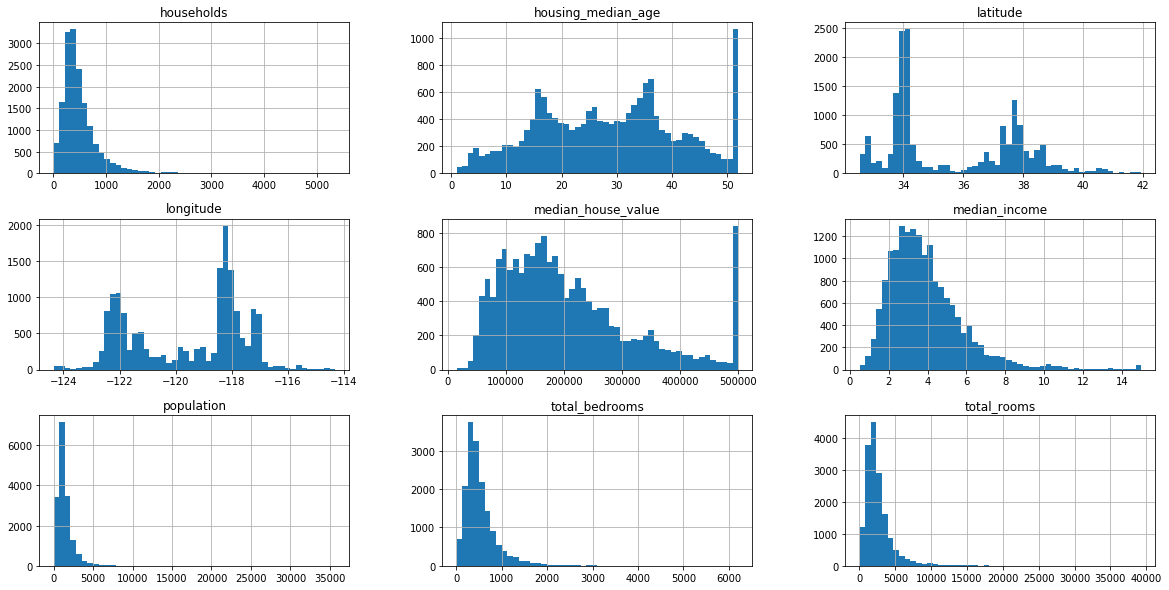

In [33]:
import pandas as pd
import os

HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_FILE=os.path.join(HOUSING_PATH,"housing.csv")

# returns a Pandas DataFrame
def load_data (data_file=HOUSING_FILE):
    data = pd.read_csv(data_file)
    return data

housing=load_data()

# Data exploration
# housing.head()
# housing.info()
# housing["ocean_proximity"].value_counts()
# housing.describe()

# Jupyter directive to draw in Jupyter
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,10))
# plt.show()

# Create random test and training sets with stratification by income
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
# Pandas cut() retuns a column containing a histogram
housing["temp_income_cat"] = pd.cut(housing["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(housing, housing["temp_income_cat"]):
    # Pandas DataFrame.loc() retrieves from array by location 
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

# Evaluate statification
# housing["temp_income_cat"].value_counts()/len(housing["temp_income_cat"])
# train_set["temp_income_cat"].value_counts()/len(strat_train_set)

# Remove the temporary column income_category.
for s in (train_set,test_set,housing):
    # Pandas DataFrame.drop() removes a column 
    s.drop("temp_income_cat",axis=1,inplace=True)
    
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50,figsize=(20,10))
plt.show()   # optional in Jupyter
